In [1]:
import sys, os
from datetime import timedelta
import datetime

In [2]:
sys.path.append('/mnt/c/Users/homer/Dropbox/personal/journal/work-journal/')

In [3]:
import view
from view import get_nth_prev_month, get_month_range, calc_worked_time_in_date_range, str_to_timedelta

In [4]:
today = datetime.date.today()
n_months = 59
hours = []
month_labels = []
monthly_worked_hours_str = []
for m in range(n_months):
    curr_yr_mn = get_nth_prev_month(today.year, today.month, n_months - m - 1)
    print(curr_yr_mn)
    month_labels.append("%d-%02d" % curr_yr_mn)
    month_range = get_month_range(*curr_yr_mn)
    res = calc_worked_time_in_date_range(month_range)
    monthly_worked_hours_str.append(res[1])

In [5]:
whs = [str_to_timedelta(worktime).seconds/3600 for worktime in monthly_worked_hours_str]
np.array(whs)
# month_labels

array([ 4.75      ,  3.46666667,  6.55      ,  9.23333333,  8.38333333,
        7.3       , 10.23333333, 11.06666667, 12.51666667,  8.63333333,
       10.45      ,  5.06666667,  2.78333333,  5.51666667,  6.73333333,
        4.53333333, 10.88333333,  3.81666667,  7.05      , 11.05      ,
       11.46666667,  9.53333333, 10.98333333, 11.73333333, 10.6       ,
       10.7       , 10.26666667,  9.38333333,  9.43333333,  6.        ,
        9.76666667,  6.61666667,  4.3       ,  4.3       ,  5.5       ,
        5.85      ,  4.18333333,  6.23333333,  7.36666667,  4.96666667,
        3.35      ,  2.91666667,  4.65      ,  6.2       ,  7.05      ,
        2.01666667,  6.03333333,  7.73333333,  4.25      ,  4.58333333,
        3.51666667,  0.95      ,  0.06666667,  0.28333333,  0.26666667,
        2.71666667,  3.25      ,  4.26666667,  3.45      ])

In [44]:
# import pandas as pd

In [58]:
# wh = pd.read_csv("monthly-work-hours.csv",header=None)
# whs = [str_to_timedelta(worktime).seconds/3600 for worktime in wh[1]]
# wh

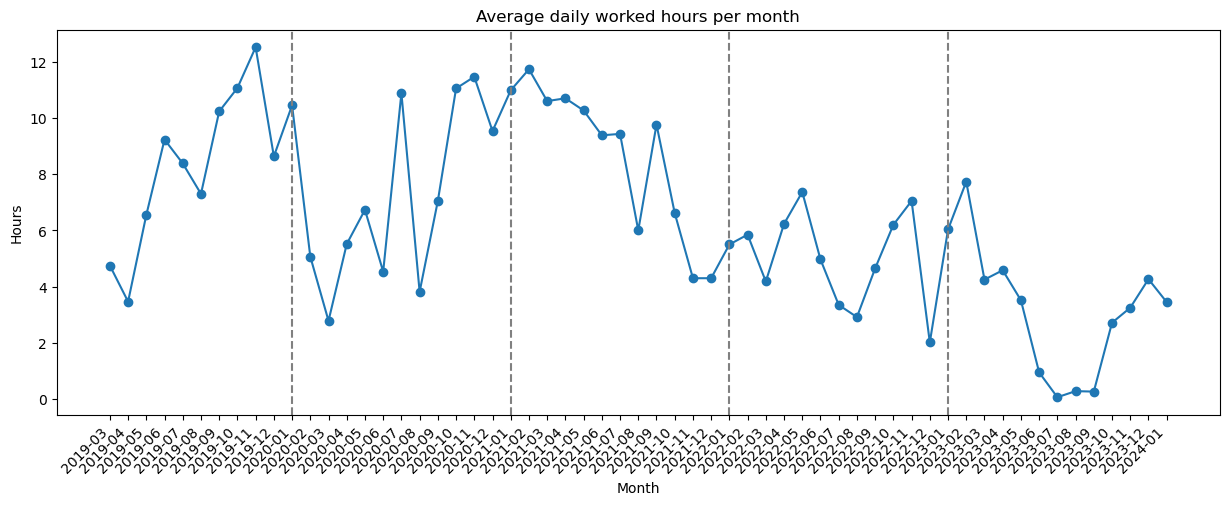

In [6]:
fig = figure(figsize=(15,5))
title("Average daily worked hours per month")
xticks(rotation=45, ha='right')
plot(month_labels,whs, "-o")
ylabel("Hours")
xlabel("Month")
axvline(month_labels.index('2020-01'), ls='--', color='gray')  # TODO: make this dependent on how many months are plotted
axvline(month_labels.index('2021-01'), ls='--', color='gray')
axvline(month_labels.index('2022-01'), ls='--', color='gray')
axvline(month_labels.index('2023-01'), ls='--', color='gray')

### TODO: add line with the number of research hours

In [51]:
fig.savefig("daily-worked-hours-per-month.png")